In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
X = np.load('mnist_data.npy')
Y = np.load('mnist_labels.npy')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
clf = LogisticRegression().fit(X_train,y_train)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))
#train accuracy is 0.96 and test accuracy is 0.905

0.905952380952381
0.960654761904762


/Users/lw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
train_acc = []
test_acc = []
for k in [1,3,5,7,9,11,13,15,17,19,21,23,25]:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    train_acc.append(neigh.score(X_train,y_train))
    test_acc.append(neigh.score(X_test, y_test))

In [ ]:
np.save("p2c_train_acc.npy", np.array(train_acc))
np.save("p2c_test_acc.npy", np.array(test_acc))

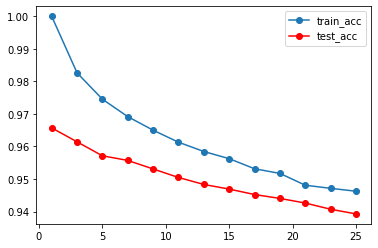

In [14]:
train_acc = np.load("p2c_train_acc.npy")
test_acc = np.load("p2c_test_acc.npy")
plot_x = np.array([1,3,5,7,9,11,13,15,17,19,21,23,25])
plt.plot(plot_x, train_acc, marker = "o", label = "train_acc")
plt.plot(plot_x, test_acc, color = "red", marker = "o", label = "test_acc")
plt.legend()
plt.savefig('p2c.png')
plt.show()

In [12]:
#e.
def fun1(X,Y,lst = [3000,6000,9000,12000,15000,18000]):
    acc = []
    for i in lst:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = i/X.shape[0], random_state=42)
        neigh = KNeighborsClassifier(n_neighbors=1)
        neigh.fit(X_train,y_train)
        score = neigh.score(X,Y)
        print(score)
        acc.append(score)
    # run on entire dataset
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X,Y)
    score = neigh.score(X,Y)
    acc.append(neigh.score(X,Y))
    return acc

accuracy = fun1(X,Y)

0.9348095238095238
0.9595238095238096
0.9729047619047619
0.9833809523809524
0.9901428571428571
0.9950476190476191


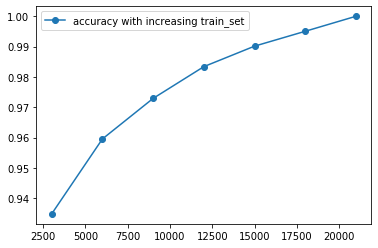

In [15]:
plot_x = np.array([3000,6000,9000,12000,15000,18000,21000])
plt.plot(plot_x, accuracy, marker = "o", label = "accuracy with increasing train_set")
plt.legend()
plt.savefig('p2e.png')
plt.show()